<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Linear_Regression(delivery_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path=r"/content/delivery_time.csv"
data=pd.read_csv(path)
data.head()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
X=data.iloc[:,:-1]
y=data.iloc[:,1]






In [4]:
X

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [5]:
y

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
X_train


,Delivery Time
10,19.83
14,12.03
18,8.00
6,19.00
19,17.83
4,29.00
2,19.75
5,15.35
16,13.75
9,18.75


In [8]:
X_train

,Delivery Time
10,19.83
14,12.03
18,8.00
6,19.00
19,17.83
4,29.00
2,19.75
5,15.35
16,13.75
9,18.75


In [9]:
y_train

10     8
14     3
18     2
6      7
19     7
4     10
2      6
5      6
16     6
9      9
7      3
17     7
3      9
0     10
15     4
12     7
Name: Sorting Time, dtype: int64

In [10]:
y_test

8     10
13     3
20     5
1      4
11     4
Name: Sorting Time, dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [12]:
y_pred=model.predict(X_test)
y_pred

array([6.73686067, 4.02382575, 8.26294281, 4.87164916, 3.70589197])

In [13]:
y_pred=model.predict(X_test)
y_pred
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R^2 Score:',r2)

Mean Squared Error: 4.637873006804292
R^2 Score: 0.2470985378564461


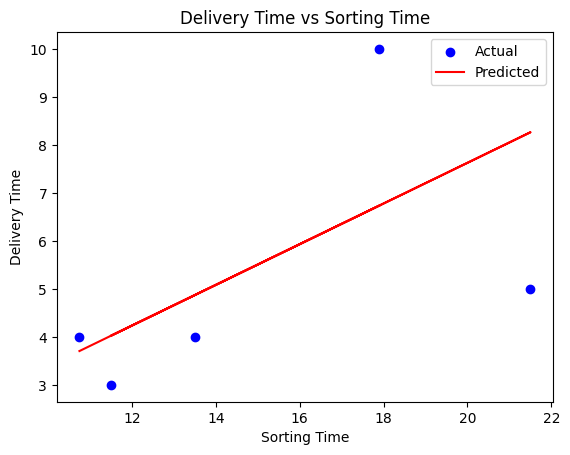

In [14]:
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.plot(X_test, y_pred, color='r', label='Predicted')
plt.title('Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()